# Table of Contents
1. [Introduction](#Introduction)
   - [Time Series Data](#time-series-data)
   - [Application Of Time Series Analysis](#application-of-time-series-analysis)
2. [Getting Started](#getting-started)
   - [Setting Up the Environment](#setting-up-th-environment)
   - [Installing Required Libraries](#installing-required-libraries)
   - [Loading Time Series Data](#loading-time-series-data)
4. [Date/Time Indexing](#datetime-indexing)
   - [Introduction to Date/Time Indexing](#introduction-to-datetime-indexing)
   - [Converting Columns to DateTime](#converting-columns-to-datetime)
   - [Setting Date/Time as Index](#setting-datetime-as-index)
   - [Handling Multiple Time Zones](#handling-multiple-time-zones)
   - [Generating Custom Date/Time Frequencies](#generating-custom-datetime-frequencies)
   
5. [Resampling](#resampling)
      - [What is Resampling?](#what-is-resampling)
      - [Downsampling: Aggregating Data](#downsampling-aggregating-data)
      - [Upsampling: Increasing Frequency](#upsampling-increasing-frequency)
      - [Custom Resampling Intervals](#custom-resampling-intervals)
6. [Rolling Windows](#rolling-windows)
    - [Introduction to Rolling Windows](#introduction-to-rolling-windows)
    -  [Calculating Rolling Mean](#2-calculate-rolling-mean)
    -  [Calculating Rolling Standard Deviation](#3-calculate-rolling-standard-deviation)
    -  [Additional Rolling Window Operations](#additional-rolling-window-operations)
    
7. [Seasonal Decomposition](#seasonal-decomposition)
    -  [What is Seasonal Decomposition?](#what-is-seasonal-decomposition)
    -  [Additive vs. Multiplicative Models](#additive-vs-multiplicative-models)
    -  [Performing Seasonal Decomposition](#performing-seasonal-decomposition)
    -  [Interpreting Decomposition Results](#interpreting-decomposition-results)
    -  [Handling Missing Values in Decomposition](#handling-missing-values-in-decomposition)



# __Introduction__

# Time Series Data

Time series data refers to a sequence of data points collected or recorded at successive points in time, often at regular intervals. This type of data is unique because it inherently includes a temporal ordering, where the position of each data point in time is crucial for understanding the dynamics of the dataset. Unlike cross-sectional data, which captures a snapshot at a single point in time, time series data allows for the analysis of trends, patterns, and changes over time.

# Application Of Time Series Analysis

Time series analysis has a wide range of applications across various domains. Here are detailed explanations of some key applications:

1. **Financial Markets:**
    * **Stock Price Prediction**
    * **Risk Management**
2. **Healthcare:**
    * **Healthcare**
    * **Disease Outbreak Prediction**
3. **Climate Science:**
    * **Weather Forecasting**
    * **Climate Change Analysis**
4. **Retail and E-commerce**
    * **Sales Forecasting**
    * **Customer Demand Prediction**
5. **Manufacturing:**
    * **Predictive Maintenance**
    * **Production Planning**
6. **Social Media and Web Analytics:**
    * **Trend Analysis**
    * **Anomaly Detection**

# Getting Started

Getting started with time series analysis involves installing the necessary libraries and loading your time series data. This foundational setup is crucial for efficiently handling and analyzing time series data.

### Setting Up th Environment:

As a developer, you likely already have Python and Jupyter Notebook set up. The next step is to ensure that you have all the necessary libraries for time series analysis installed.

### Installing Required Libraries:

For comprehensive time series analysis, you’ll need several Python libraries that facilitate data manipulation, visualization, and modeling. The key libraries include:

1. **pandas:** For data manipulation and analysis.
2. **numpy:** For numerical computations.
3. **matplotlib and seaborn:** For creating visualizations.
4. **statsmodels:** For statistical modeling.
5. **scikit-learn:** For machine learning algorithms.
6. **fbprophet:** For time series forecasting.
7. **tensorflow:** For advanced forecasting with neural networks like LSTM.

To install these libraries, use the following pip commands in your terminal or Jupyter Notebook:
```pip install pandas numpy matplotlib seaborn statsmodels scikit-learn fbprophet tensorflow ```

### Loading Time Series Data:

Loading time series data into your environment is the first step in any analysis. Here, we’ll demonstrate how to read a CSV file containing time series data using ```pandas```.

1. __Create a Sample CSV File:__
- For illustration, let’s assume we have a CSV file named __detailed_time_series_data.csv__ with the following structure:
```
date,sales,temperature,holiday,promotion
2021-01-01,100,30,0,0
2021-01-02,105,31,0,1
2021-01-03,102,32,0,0
2021-01-04,110,29,0,0
2021-01-05,108,28,0,1
2021-01-06,107,30,0,0
2021-01-07,115,31,0,1
2021-01-08,120,32,1,0
2021-01-09,125,33,1,0
2021-01-10,123,30,0,0

```
2. __Load the CSV file:__
- Use pandas to read the CSV file, parse the dates, and set the date column as the index.
- Here’s how you can do it in Python:

In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Reading the CSV file with time series data
data = pd.read_csv(r'D:\internship\vs code\projects\datasets\detailed_time_series_data.csv', parse_dates=['date'], index_col='date')

# Display the first few rows of the dataframe
print(data.head())

# Basic information about the dataset
print(data.info())

# Display basic statistics of the dataset
print(data.describe())

            sales  temperature  holiday  promotion
date                                              
2021-01-01    100           30        0          0
2021-01-02    105           31        0          1
2021-01-03    102           32        0          0
2021-01-04    110           29        0          0
2021-01-05    108           28        0          1
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2021-01-01 to 2021-01-10
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   sales        10 non-null     int64
 1   temperature  10 non-null     int64
 2   holiday      10 non-null     int64
 3   promotion    10 non-null     int64
dtypes: int64(4)
memory usage: 400.0 bytes
None
            sales  temperature    holiday  promotion
count   10.000000    10.000000  10.000000  10.000000
mean   111.500000    30.600000   0.200000   0.300000
std      8.809717     1.505545   0.421637   0.483046
min    100.000000    

3. __Verify Data Loading:__

- Ensure that the data is loaded correctly by inspecting the first few rows and checking the data types and summary statistics.
- This initial inspection helps confirm that the data is correctly formatted and ready for analysis.

# Date/Time Indexing

# Introduction to Date/Time Indexing
Date/time indexing involving using date and time values as the index for your data. This is essential for time series analysis as it provides several key advantages:

- __Efficient Time-Based Operations:__ Enables Slicing, resampling, and aggregation of data based on specific time periods.
- __Chronological Order:__ Ensures that the data is in the correct chronological order, which is vital for time-dependent analysis. 
- __Simplified Time Manipulation:__ Facilitates the use of time-aware functions and methods provided by pandas.
Proper date/time indexing is the foundation for any time series analysis, allowing for accurate and efficient data manipulation and analysis.

#  Converting Columns to DateTime
To perform date/time indexing, the date and time columns in your dataset must be in a `datetime` format. Pandas provides a convenient method to convert these columns.


In [27]:
import pandas as pd

# Sample Data
data = {
    'date': ['2021-01-01', '2021-01-02', '2021-01-03'],
    'sales': [100, 105, 102]
}

df = pd.DataFrame(data)

# Convert 'date' Column to datetime 
df['date'] = pd.to_datetime(df['date'])

# Print dataframe
print(df)

        date  sales
0 2021-01-01    100
1 2021-01-02    105
2 2021-01-03    102


__Explanation:__

The ``pd.to_datetime()`` function converts the ‘date’ column to datetime format, ensuring that dates are recognized as datetime objects, which is essential for time series operations.

# Setting Date/Time as Index

Once your date/time column is in `datetime` format, you can set it as the index of your DataFrame. This is crucial for enabling time-based operations.

__Example:__ Setting Date/Time as Index

In [28]:
# Set 'date' column as index 
df.set_index('date', inplace = True)

print(df)

            sales
date             
2021-01-01    100
2021-01-02    105
2021-01-03    102


__Explanation:__

The __set_index()__ method is used to set the ‘date’ column as the index, allowing for efficient time-based slicing, querying, and manipulation of the data.

# Handling Multiple Time Zones
 
Time series data may come from different time zones. Handling multiple time zones correctly ensures accurate analysis and comparison.

__Example:__ Localizing and Converting Time Zones

In [29]:
# Sample data with datetime index 

data = {
    'date': ['2021-01-01 10:00', '2021-01-02 11:00', '2021-01-03 12:00'],
    'sales': [100, 105, 102]
}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)

# Localize ro a specific time zone (UTC)
df = df.tz_localize('UTC')

# Convert to another time zone (US/Eastern)

df = df.tz_convert('US/Eastern')

print(df)

                           sales
date                            
2021-01-01 05:00:00-05:00    100
2021-01-02 06:00:00-05:00    105
2021-01-03 07:00:00-05:00    102


__Explaination:__

- The tz_localize() method assigns a time zone to the datetime index.

- The tz_convert() method converts the datetime index to a different time zone, ensuring time series data is correctly aligned across time zones.

# Generating Custom Date/Time Frequencies
Generating custom date/time frequencies is useful for creating new time series data or resampling existing data to a different frequency.

__Example:__ Creating a Custom Date Range

In [30]:
# Generate a range of dates with daily frequency 
date_range = pd.date_range(start = '2021-01-01', end = '2021-01-10', freq='D')
print(date_range)

# Generating a range of dates with custom frequency (every 2 days)
custom_date_range = pd.date_range(start = '2021-01-01', end = '2021-01-10', freq='2D')
print(custom_date_range)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2021-01-01', '2021-01-03', '2021-01-05', '2021-01-07',
               '2021-01-09'],
              dtype='datetime64[ns]', freq='2D')


__Explanation:__

- The `pd.date_range()` function generates a range of dates with a specified frequency.
- Common frequencies include `D` (daily), `H` (hourly), `M` (monthly), `Q` (quarterly), and `A` (annually).
- Custom frequencies can be specified using offset aliases, such as 2D for every 2 days.

## Summary

Mastering date/time indexing is essential for managing and analyzing time series data. Here’s a recap of the steps involved:

1. __Introduction to Date/Time Indexing:__ Understand the importance and benefits of using date/time indexing in time series analysis.
2. __Converting Columns to DateTime:__ Use `pd.to_datetime() `to convert columns to datetime format.
3. __Setting Date/Time as Index:__ Use `set_index()` to set the date/time column as the index.
Handling Multiple Time Zones: Use `tz_localize()` and `tz_convert()` to handle different time zones.
4. __Generating Custom Date/Time Frequencies:__ Use `pd.date_range()` to create custom date ranges with specified frequencies.

These techniques form the foundation for more advanced time series analysis, enabling you to handle and manipulate time-based data with precision and efficiency.

# Resampling 
Resampling is a powerful technique in time series analysis that involves changing the frequency of your time series data. This technique is essential for summarizing data, detecting trends, and aligning data to common time intervals. Resampling can be performed in two main ways: downsampling and upsampling. Additionally, you can create custom resampling intervals to suit specific analysis needs.

## What is Resampling?

`Resampling` in time series data refers to changing the frequency of observations, either by aggregating or summarizing data over a longer period (downsampling) or by filling in or interpolating missing data points to a higher frequency (upsampling). It’s a powerful technique to manage and analyze time series data, depending on the specific needs of the analysis. 

### Key Concepts
1. __Downsampling:__ Reduces the frequency of the time series data by aggregating data over a longer time period.
2. __Upsampling:__ Increases the frequency of the time series data by introducing additional time points and interpolating missing values.

__Detailed Example__

Let’s walk through a detailed example of resampling with Python’s `pandas` library. In this example, we’ll use hourly temperature data and demonstrate both downsampling and upsampling.

1. __Setup and Sample Data Creation__

In [41]:
import pandas as pd
import numpy as np
# Create a date range with hourly reqfuency 
date_rng = pd.date_range(start = '2023-01-01', end = '2023-01-08', freq = 'h')


# Generate random temperature data between 15 and 25 degree Celcius
np.random.seed(42) # For reproducibility
temperature  = np.random.uniform(low = 15, high = 25, size = (len(date_rng)))

# Create a DataFrame with the generated data
df = pd.DataFrame(date_rng, columns = ['date'])
df['temperature'] = temperature
df.set_index('date', inplace = True)

# Display the first few rows of the DataFrame
print("Original Hourly Data:")
print(df.to_string())
print("\n")


Original Hourly Data:
                     temperature
date                            
2023-01-01 00:00:00    18.745401
2023-01-01 01:00:00    24.507143
2023-01-01 02:00:00    22.319939
2023-01-01 03:00:00    20.986585
2023-01-01 04:00:00    16.560186
2023-01-01 05:00:00    16.559945
2023-01-01 06:00:00    15.580836
2023-01-01 07:00:00    23.661761
2023-01-01 08:00:00    21.011150
2023-01-01 09:00:00    22.080726
2023-01-01 10:00:00    15.205845
2023-01-01 11:00:00    24.699099
2023-01-01 12:00:00    23.324426
2023-01-01 13:00:00    17.123391
2023-01-01 14:00:00    16.818250
2023-01-01 15:00:00    16.834045
2023-01-01 16:00:00    18.042422
2023-01-01 17:00:00    20.247564
2023-01-01 18:00:00    19.319450
2023-01-01 19:00:00    17.912291
2023-01-01 20:00:00    21.118529
2023-01-01 21:00:00    16.394939
2023-01-01 22:00:00    17.921446
2023-01-01 23:00:00    18.663618
2023-01-02 00:00:00    19.560700
2023-01-02 01:00:00    22.851760
2023-01-02 02:00:00    16.996738
2023-01-02 03:00:00  

__Explanation:__

- __Date Range Creation:__ `pd.date_range(start='2023-01-01', end='2023-01-08', freq='H')` generates a time series index with hourly frequency.

- __Data Generation:__ Random temperatures are created to simulate hourly readings.

- __DataFrame Creation:__ The data is organized into a DataFrame, with the date column set as the index.


## Downsampling: Aggregating Data

__Downsampling__ is a technique used to reduce the frequency of observations in a time series by aggregating data over longer periods. This process is valuable for summarizing data, reducing noise, and simplifying analysis.

__Key Concepts of Downsampling__

- __Frequency Change:__ Downsampling involves converting a time series from a higher frequency (e.g., hourly) to a lower frequency (e.g., daily).

- __Aggregation Methods:__ Data points within the new time interval are combined using aggregation functions such as mean, sum, min, max, etc.


### Example of Downsampling

Let’s consider a time series dataset of hourly sales data and demonstrate how to downsample it to daily data, aggregating the total sales for each day.

### __Step-by-Step Guide__

### Create Sample Data

We’ll generate a DataFrame with hourly sales data for a week.

In [30]:
# Import Libraries
import numpy as np
import pandas as pd 

# Create a data range with hourly frequency 
date_rng = pd.date_range(start='2023-01-01', end='2023-01-08', freq='h')

# Generate random sales data
np.random.seed(42)
sales = np.random.randint(100, 500, size = (len(date_rng)))

# Create a DataFrame
df = pd.DataFrame(date_rng, columns = ['date'])
df['sales'] = sales
df.set_index('date', inplace = True)

# Display the First few rows of the DataFrame
print("Original Hourly Sales Data:")
print(df.head())


Original Hourly Sales Data:
                     sales
date                      
2023-01-01 00:00:00    202
2023-01-01 01:00:00    448
2023-01-01 02:00:00    370
2023-01-01 03:00:00    206
2023-01-01 04:00:00    171


__Explaination:__ 

- __Date Range Creation:__ `pd.date_range(start='2023-01-01', end='2023-01-08', freq='H')` generates hourly timestamps.

- __Sales Data Generation:__ Random integers between 100 and 500 represent hourly sales.

- __DataFrame Creation:__ The DataFrame contains hourly sales data, with the date column set as the index.


2. __Downsampling to Daily Data__

We will aggregate the hourly sales data to daily sales by calculating the total sales for each day.

In [31]:
# Downsampling to daily frequency, calculating the total salse for each day
daily_sales = df.resample('D').sum()

# Display the daily sales data
print("Downsample Daily Sales Date(Total Sales):")
print(daily_sales)

Downsample Daily Sales Date(Total Sales):
            sales
date             
2023-01-01   7396
2023-01-02   7043
2023-01-03   7545
2023-01-04   7931
2023-01-05   7104
2023-01-06   6819
2023-01-07   6886
2023-01-08    426


__Explanation:__

- __Resampling to Daily Frequency:__` df.resample('D').sum()` aggregates hourly sales into daily total sales.

- __Aggregation Function:__ The `sum()` function computes the total sales for each day. 


### Detailed Breakdown

1. __Original Data Creation:__
- __Hourly Frequency:__ Data is collected every hour.
- __Random Sales Data:__ Simulates real-world sales data with variability.
2. __Resampling:__
- __Frequency Code 'D':__ Specifies daily frequency for aggregation.
- __Aggregation Function sum():__ Adds up all sales within each day to get the total daily sales.
3. __Result Analysis:__
- __Downsampled Data:__ Provides daily totals which are easier to analyze for trends or reporting purposes.


### Additional Aggregation Methods

You can use various aggregation functions depending on your needs:

__Mean Sales:__
 

In [32]:
daily_mean_sales = df.resample('D').mean()
print("Downsampled Daily Sales Data (Mean Sales):")
print(daily_mean_sales)

Downsampled Daily Sales Data (Mean Sales):
                 sales
date                  
2023-01-01  308.166667
2023-01-02  293.458333
2023-01-03  314.375000
2023-01-04  330.458333
2023-01-05  296.000000
2023-01-06  284.125000
2023-01-07  286.916667
2023-01-08  426.000000


- __Minimum Sales:__

In [33]:
daily_minimum_sales = df.resample('D').min()
print("Downsampled Daily Sales Data (Minimum Sales):")
print(daily_minimum_sales)

Downsampled Daily Sales Data (Minimum Sales):
            sales
date             
2023-01-01    120
2023-01-02    120
2023-01-03    101
2023-01-04    143
2023-01-05    108
2023-01-06    104
2023-01-07    112
2023-01-08    426


- __Maximum Sales:__

In [34]:
daily_maximum_sales = df.resample('D').max()
print("Downsampled Daily Sales Data (Maximum Sales):")
print(daily_maximum_sales)

Downsampled Daily Sales Data (Maximum Sales):
            sales
date             
2023-01-01    485
2023-01-02    463
2023-01-03    489
2023-01-04    466
2023-01-05    491
2023-01-06    497
2023-01-07    492
2023-01-08    426


### Summary

- `Downsampling` involves reducing the data frequency by aggregating values over longer time intervals.
- __Aggregation Methods:__ Common methods include sum, mean, min, and max, depending on the analysis requirements.
- __Use Cases:__ Simplifying data for trend analysis, reducing noise, and summarizing large datasets.


## Upsampling: Increasing Frequency

`Upsampling` is a technique used to increase the frequency of observations in a time series. This involves introducing additional time points and filling in or interpolating values to create a more detailed dataset. Upsampling is particularly useful for applications requiring high-resolution data or when integrating data from different sources.

__Key Concepts of Upsampling__

1. __Frequency Increase:__ Upsampling changes the time series from a lower frequency to a higher frequency (e.g., daily to hourly).
2. __Interpolation Methods:__ Missing values created by upsampling are filled in using methods such as linear interpolation, forward filling, or backward filling.

## Detailed Example of Upsampling

Let’s walk through an example of upsampling using Python’s `pandas` library. We’ll start with daily sales data and increase its frequency to hourly data, filling in missing values through interpolation.

## Step-by-Step Guide
1. __Create Sample Data__

We’ll start by creating a DataFrame with daily sales data.

In [35]:
# Import required libraries 
import pandas as pd
import numpy as np

# create a data range with daily frequency 
date_rng = pd.date_range(start = '2023-01-01', end = '2023-01-07', freq='D')

# Generate random salse data 
np.random.seed(42)
sales = np.random.randint(1000, 5000, size = (len(date_rng)))

# Create Dataframe 
df = pd.DataFrame(date_rng, columns = ['date'])
df['sales'] = sales
df.set_index('date', inplace = True)

# Display The first feew rows of the DataFrame
print("Original Daily Sales Data:")
print(df)
# print("\n")

Original Daily Sales Data:
            sales
date             
2023-01-01   4174
2023-01-02   4507
2023-01-03   1860
2023-01-04   2294
2023-01-05   2130
2023-01-06   2095
2023-01-07   4772


__Explanation:__

- __Date Range Creation:__ `pd.date_range(start='2023-01-01', end='2023-01-07', freq='D')` generates daily timestamps.
 
- __Sales Data Generation:__ Random integers between 1000 and 5000 represent daily sales.
- __DataFrame Creation:__ The DataFrame contains daily sales data, with the date column set as the index.

__Upsampling to Hourly Data__

We will increase the frequency to hourly and fill in missing values using linear interpolation.

In [36]:
# Upsample to hourly frequency
hourly_sales = df.resample('h').mean()
print(df.to_string())
# Interpolate missing values for upsampling
hourly_sales_interpolated = hourly_sales.interpolate(method = 'linear')

# Display the first few rows of the interpolated hourly sales data
print("Upsampled Data (Hourly Intervals with Interpolation):")
print(hourly_sales_interpolated.head(10))
print("\n")

# Display the last few rows to see interpolation at the end of the period
print("Upsampled Data - Last Few Rows:")
print(hourly_sales_interpolated.tail(10))



            sales
date             
2023-01-01   4174
2023-01-02   4507
2023-01-03   1860
2023-01-04   2294
2023-01-05   2130
2023-01-06   2095
2023-01-07   4772
Upsampled Data (Hourly Intervals with Interpolation):
                        sales
date                         
2023-01-01 00:00:00  4174.000
2023-01-01 01:00:00  4187.875
2023-01-01 02:00:00  4201.750
2023-01-01 03:00:00  4215.625
2023-01-01 04:00:00  4229.500
2023-01-01 05:00:00  4243.375
2023-01-01 06:00:00  4257.250
2023-01-01 07:00:00  4271.125
2023-01-01 08:00:00  4285.000
2023-01-01 09:00:00  4298.875


Upsampled Data - Last Few Rows:
                           sales
date                            
2023-01-06 15:00:00  3768.125000
2023-01-06 16:00:00  3879.666667
2023-01-06 17:00:00  3991.208333
2023-01-06 18:00:00  4102.750000
2023-01-06 19:00:00  4214.291667
2023-01-06 20:00:00  4325.833333
2023-01-06 21:00:00  4437.375000
2023-01-06 22:00:00  4548.916667
2023-01-06 23:00:00  4660.458333
2023-01-07 00:00:00  4772.0

__Explanation:__

- __Resampling to Hourly Frequency:__ `df.resample('H').mean()` creates new hourly time points between existing daily data points.
- __Interpolation:__ `interpolate(method='linear')` fills in missing values by linearly interpolating between existing data points. 


## Detailed Breakdown
1. __Original Data Creation:__
- __Daily Frequency:__ The data is collected once per day.
- __Random Sales Data:__ Simulates daily sales figures with variability.

2. __Upsampling:__
- __Frequency Code 'H':__ Specifies hourly frequency for upsampling.
- __Interpolation Method:__ linear method estimates values between existing data points, creating a smooth transition between them.

3. __Result Analysis:__
Upsampled Data: Provides detailed hourly sales data, with values interpolated between daily observations.

## Additional Interpolation Methods
Depending on your needs, you can use various interpolation methods:

- __Forward Fill:__

In [37]:
hourly_sales_ffill = df.resample('h').ffill()
print("Upsampled Data (Hourly Intervals with Forward Fill):")
print(hourly_sales_ffill.head())

Upsampled Data (Hourly Intervals with Forward Fill):
                     sales
date                      
2023-01-01 00:00:00   4174
2023-01-01 01:00:00   4174
2023-01-01 02:00:00   4174
2023-01-01 03:00:00   4174
2023-01-01 04:00:00   4174


- __Backward Fill__

In [38]:
hourly_sales_bfill = df.resample('h').bfill()
print("Upsampled Data (Hourly Intervals with Backward Fill):")
print(hourly_sales_bfill.head(10))

Upsampled Data (Hourly Intervals with Backward Fill):
                     sales
date                      
2023-01-01 00:00:00   4174
2023-01-01 01:00:00   4507
2023-01-01 02:00:00   4507
2023-01-01 03:00:00   4507
2023-01-01 04:00:00   4507
2023-01-01 05:00:00   4507
2023-01-01 06:00:00   4507
2023-01-01 07:00:00   4507
2023-01-01 08:00:00   4507
2023-01-01 09:00:00   4507


## Summary

- `Upsampling` increases the frequency of data points by introducing new time intervals and filling in the missing values.

- __Interpolation Methods:__ Common methods include linear interpolation, forward fill, and backward fill, depending on the required smoothness and data characteristics.

- __Applications:__ Useful for enhancing data resolution, integrating data sources, and creating more detailed analyses.

## Custom Resampling Intervals

Custom resampling intervals allow you to specify non-standard time frequencies for aggregating or interpolating time series data. This flexibility can be useful for applications requiring specific time intervals that are not directly supported by built-in resampling options.

__Key Concepts__
1. __Custom Intervals:__ Define intervals such as every 2 hours, every 15 minutes, or any other specific period not available in default options.
2. __Aggregation and Interpolation:__ Depending on the interval, you may aggregate data (e.g., summing or averaging) or interpolate missing values.

### Example of Custom Resampling Intervals

Let’s use a time series dataset with hourly sales data and demonstrate how to apply custom resampling intervals.

### Step-by-Step Guide
1. __Create Sample Data__

We’ll generate hourly sales data and then resample it using custom intervals.

In [2]:
import pandas as pd
import numpy as np

# Create a date range with hourly frequency
date_rng = pd.date_range(start='2023-01-01', end='2023-01-07', freq='h')

# Generate random sales data
np.random.seed(42)
sales = np.random.randint(100, 500, size=(len(date_rng)))

# Create a DataFrame
df = pd.DataFrame(date_rng, columns=['date'])
df['sales'] = sales
df.set_index('date', inplace=True)

# Display the first few rows of the DataFrame
print("Original Hourly Sales Data:")
print(df.head(10))


Original Hourly Sales Data:
                     sales
date                      
2023-01-01 00:00:00    202
2023-01-01 01:00:00    448
2023-01-01 02:00:00    370
2023-01-01 03:00:00    206
2023-01-01 04:00:00    171
2023-01-01 05:00:00    288
2023-01-01 06:00:00    120
2023-01-01 07:00:00    202
2023-01-01 08:00:00    221
2023-01-01 09:00:00    314


__Explanation:__

-  __Date Range Creation:__ Generates hourly timestamps.
- __Sales Data Generation:__ Random integers simulate hourly sales figures.
- __DataFrame Creation:__ Organizes data with hourly frequency.

2. __Custom Resampling Intervals__

Let’s resample the data to every 3 hours and every 15 minutes using custom intervals.

In [9]:
# Resample to every 3 hours and calculate the mean sales
sales_3h = df.resample('3h').mean()

# Resample to enery 15 minutes and forward fill missing values 
sales_15m = df.resample('15min').ffill()

# Dislpay the resampled data
print("Resampled Data (Every 3 Hours):")
print(sales_3h.head(10))
print("\n")

print("Resampled Data (Every 15 Minutes with Forward Fill):")
print(sales_15m.head(10))


Resampled Data (Every 3 Hours):
                          sales
date                           
2023-01-01 00:00:00  340.000000
2023-01-01 03:00:00  221.666667
2023-01-01 06:00:00  181.000000
2023-01-01 09:00:00  310.333333
2023-01-01 12:00:00  376.666667
2023-01-01 15:00:00  243.333333
2023-01-01 18:00:00  402.666667
2023-01-01 21:00:00  389.666667
2023-01-02 00:00:00  349.666667
2023-01-02 03:00:00  269.333333


Resampled Data (Every 15 Minutes with Forward Fill):
                     sales
date                      
2023-01-01 00:00:00    202
2023-01-01 00:15:00    202
2023-01-01 00:30:00    202
2023-01-01 00:45:00    202
2023-01-01 01:00:00    448
2023-01-01 01:15:00    448
2023-01-01 01:30:00    448
2023-01-01 01:45:00    448
2023-01-01 02:00:00    370
2023-01-01 02:15:00    370


__Explanation:__

- __3-Hour Interval:__ `df.resample('3H').mean()` aggregates data every 3 hours, calculating the mean sales for each interval.
- __15-Minute Interval:__ `df.resample('15T').ffill()` resamples data every 15 minutes and uses forward fill to handle missing values.


## Detailed Breakdown

1. __Original Data Creation:__

- __Hourly Frequency:__ Data is collected hourly.
- __Random Sales Data:__ Simulates variability in hourly sales.
2. __Custom Resampling:__
- __3-Hour Interval:__ Aggregates data over 3-hour periods, averaging sales within each period.
- __15-Minute Interval:__ Increases frequency to every 15 minutes and fills missing values with the previous value (forward fill).
3. __Result Analysis:__
- __3-Hour Data:__ Provides summarized data at a less granular level, useful for observing longer-term trends.
- __15-Minute Data:__ Provides more detailed data, filling in gaps between hourly observations.

### Additional Considerations

- __Custom Intervals:__ You can specify custom intervals using codes like ‘2h’ (2 hours), ’10min’ (10 minutes), or any other period.

- __Interpolation Methods:__ Besides forward fill, other methods like backward fill and linear interpolation can be used depending on the data and analysis needs.
### Summary
- __Applications:__ Useful for detailed analysis, integrating datasets, and managing time series data with specific needs.

- __Custom Resampling Intervals:__ allow for flexible time aggregation or interpolation tailored to specific requirements.

- __Aggregation:__ Summarize data over custom intervals (e.g., every 3 hours).

- __Interpolation:__ Fill in missing data for higher frequency intervals (e.g., every 15 minutes).



# Rolling Windows

### Introduction to Rolling Windows

Rolling windows are used in time series analysis to apply statistical functions over a moving window of data points. This technique helps in smoothing data, calculating moving averages, and detecting trends or anomalies by evaluating data within a specified window size that “rolls” over the series.


### Key Concepts of Rolling Windows

1. __Window Size:__ The number of data points used for each calculation. For example, a window size of 3 means that calculations are based on the current data point and the previous two data points.
2. __Rolling Operations:__ Statistical functions like mean, sum, min, max, standard deviation, etc., are applied over each window.
3.__Window Alignment:__ Determines where the window is aligned relative to the data points (e.g., center, right, or left).

### Detailed Example of Rolling Windows

Let’s demonstrate rolling windows using Python’s pandas library. We’ll use a time series dataset to calculate a rolling mean and rolling standard deviation.


## Step-by-Step Guide
#### 1. Create Sample Data

We’ll generate a DataFrame with daily sales data



In [12]:
# Import libraries 
import numpy as np 
import pandas as pd

# Create a data range with daily frequency 
date_rng = pd.date_range(start='2023-01-01', end='2023-01-10', freq='D')

# Generate Random salses data
np.random.seed(42)
sales = np.random.randint(100,500, size = (len(date_rng)))

# Create DatFrame
df = pd.DataFrame(date_rng, columns = ['date'])
df['sales'] = sales
df.set_index('date', inplace = True)

# Display the original data
print("Original Daily Sales Data:")
print(df)




Original Daily Sales Data:
            sales
date             
2023-01-01    202
2023-01-02    448
2023-01-03    370
2023-01-04    206
2023-01-05    171
2023-01-06    288
2023-01-07    120
2023-01-08    202
2023-01-09    221
2023-01-10    314


### 2. Calculate Rolling Mean
 
We will compute a rolling mean with a window size of 3 days.

In [13]:
# Calculate rolling mean with a window of 3 days 
rolling_mean = df['sales'].rolling(window = 3).mean()

# Display the rolling mean
print("Rolling Mean (3-Day Window):", rolling_mean)

Rolling Mean (3-Day Window): date
2023-01-01           NaN
2023-01-02           NaN
2023-01-03    340.000000
2023-01-04    341.333333
2023-01-05    249.000000
2023-01-06    221.666667
2023-01-07    193.000000
2023-01-08    203.333333
2023-01-09    181.000000
2023-01-10    245.666667
Name: sales, dtype: float64


__Explanation:__

- __Rolling Mean Calculation:__ `df['sales'].rolling(window=3).mean()` calculates the mean of the current and previous two days.

- The rolling mean is calculated over a 3-day window. The first two days have NaN values because there aren’t enough data points to compute the mean.

### 3. Calculate Rolling Standard Deviation

We will compute a rolling standard deviation with the same window size of 3 days.

In [14]:
# Calculate rolling standart deviation with size of 3 days
rolling_std = df['sales'].rolling(window = 3).std() 

# Display the rolling standard deviation
print("Rolling Standard Deviation (3-Day Window):",rolling_std)

Rolling Standard Deviation (3-Day Window): date
2023-01-01           NaN
2023-01-02           NaN
2023-01-03    125.713961
2023-01-04    123.520579
2023-01-05    106.240294
2023-01-06     60.052755
2023-01-07     86.133617
2023-01-08     84.007936
2023-01-09     53.674948
2023-01-10     59.936077
Name: sales, dtype: float64


__Explanation:__

- __Rolling Standard Deviation Calculation:__ `df['sales'].rolling(window=3).std()` calculates the standard deviation of the current and previous two days.

- The rolling standard deviation measures the variability in sales over a 3-day window.

### Detailed Breakdown

1. __Original Data Creation:__

- __Daily Frequency:__ Data is collected once per day.

- __Random Sales Data:__ Simulates daily sales figures with variability.

2. __Rolling Mean:__

- __Window Size:__ window=3 means calculating the mean over the current and the previous two days.

- __Output:__ Provides a smoothed view of sales trends.

3. __Rolling Standard Deviation:__

- __Window Size:__ window=3 means calculating the standard deviation over the current and previous two days.

- __Output:__ Measures variability and helps in identifying periods of high or low volatility.

### Additional Rolling Window Operations

Besides mean and standard deviation, you can perform various other operations:

- __Sum:__

In [15]:
rolling_sum = df['sales'].rolling(window=3).sum()
print("Rolling Sum (3-Day Window):")
print(rolling_sum)

Rolling Sum (3-Day Window):
date
2023-01-01       NaN
2023-01-02       NaN
2023-01-03    1020.0
2023-01-04    1024.0
2023-01-05     747.0
2023-01-06     665.0
2023-01-07     579.0
2023-01-08     610.0
2023-01-09     543.0
2023-01-10     737.0
Name: sales, dtype: float64


- __Minimum__

In [16]:
rolling_min = df['sales'].rolling(window=3).min()
print("Rolling Minimum (3-Day Window):")
print(rolling_min)

Rolling Minimum (3-Day Window):
date
2023-01-01      NaN
2023-01-02      NaN
2023-01-03    202.0
2023-01-04    206.0
2023-01-05    171.0
2023-01-06    171.0
2023-01-07    120.0
2023-01-08    120.0
2023-01-09    120.0
2023-01-10    202.0
Name: sales, dtype: float64


- __Maximum__

In [17]:
rolling_max = df['sales'].rolling(window=3).max()
print("Rolling Maximum (3-Day Window):")
print(rolling_max)

Rolling Maximum (3-Day Window):
date
2023-01-01      NaN
2023-01-02      NaN
2023-01-03    448.0
2023-01-04    448.0
2023-01-05    370.0
2023-01-06    288.0
2023-01-07    288.0
2023-01-08    288.0
2023-01-09    221.0
2023-01-10    314.0
Name: sales, dtype: float64


### Summary

- __Rolling Windows__ allow you to apply statistical functions over a moving window of data points, useful for smoothing, trend detection, and anomaly detection.

- __Window Size:__ Determines the number of data points included in each calculation.

- __Operations:__ Common operations include mean, standard deviation, sum, min, and max.

- __Applications:__ Ideal for analyzing trends, smoothing data, and detecting fluctuations in time series data.


# Seasonal Decomposition

Seasonal decomposition is a fundamental technique in time series analysis that helps break down a time series into its core components: trend, seasonality, and residuals. Understanding these components allows for better insights into the underlying patterns and enhances forecasting accuracy. Below is a comprehensive guide to seasonal decomposition, tailored for developers seeking to deepen their knowledge.

# What is Seasonal Decomposition?

Seasonal decomposition involves separating a time series into distinct components to better understand its underlying structure. This process helps isolate and analyze different patterns within the data.

- __Trend:__ Represents the long-term movement or direction in the data, showing whether values are increasing or decreasing over time.

- __Seasonality:__ Captures repeating patterns or cycles occurring at regular intervals, such as monthly or quarterly.

- __Residuals:__ Contains the random noise or irregular variations that remain after removing the trend and seasonal effects.


__Purpose:__

- __Identify Patterns:__ By breaking down the series, you can clearly see trends, seasonal effects, and anomalies.

- __Improve Forecasting:__ Accurate decomposition helps in creating better forecasting models by isolating predictable components.

__Example:__ Consider a time series of monthly electricity consumption data. Seasonal decomposition can reveal:

- __Trend:__ Whether electricity usage is increasing over the years.

- __Seasonality:__ Higher consumption during summer months due to air conditioning.
- __Residuals:__ Irregular spikes or drops not explained by trend or seasonality.

# Additive vs. Multiplicative Models

__Additive Model:__

- __Definition:__ Assumes that the time series is the sum of trend, seasonality, and residuals: Time Series=Trend+Seasonality+Residuals\text{Time Series} = \text{Trend} + \text{Seasonality} + \text{Residuals}Time Series=Trend+Seasonality+Residuals
- __Use Case:__ Appropriate when the seasonal effect is consistent over time, regardless of the trend level.

__Example:__ Monthly retail sales where the effect of holiday promotions does not change in intensity over the years would be modeled additively.

__Multiplicative Model:__

- __Definition:__ Assumes that the time series is the product of trend, seasonality, and residuals: 

Time Series=Trend×Seasonality×Residuals\text{Time Series} = \text{Trend} \times \text{Seasonality} \times \text{Residuals}Time Series=Trend×Seasonality×Residuals

- __Use Case:__ Suitable when the seasonal effect scales with the level of the trend.

__Example:__ For a company’s revenue, where higher revenue months also experience proportionally higher seasonal effects (e.g., increased sales during the holiday season), a multiplicative model would be used.

# Performing Seasonal Decomposition
To perform seasonal decomposition, you can use the `seasonal_decompose` function from the `statsmodels` library. This function separates the time series into trend, seasonal, and residual components.

__Example Code:__


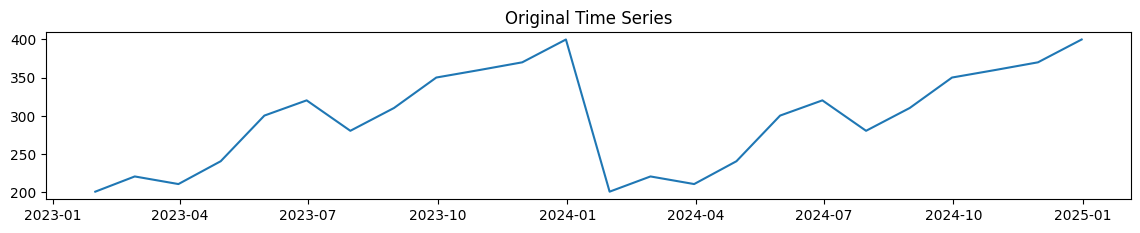

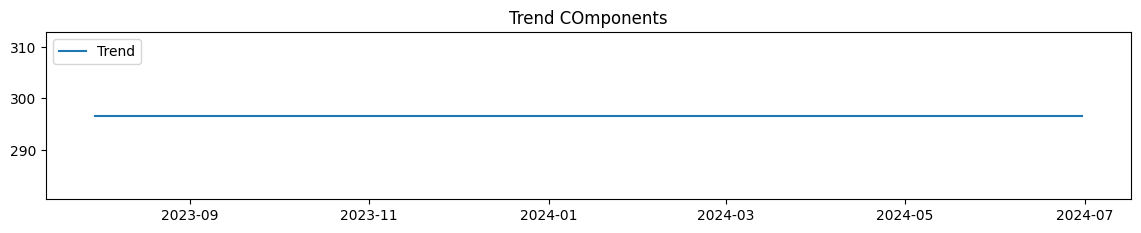

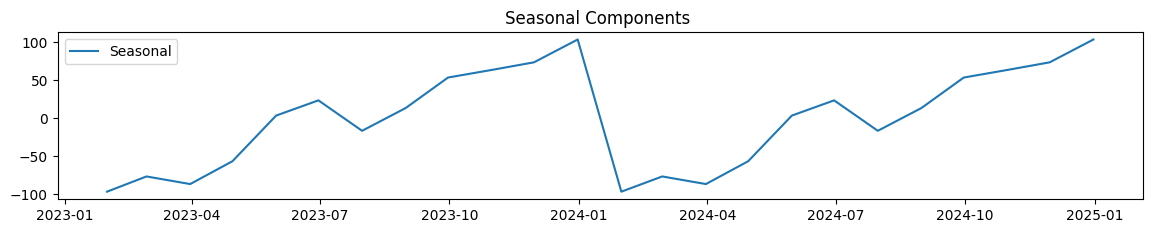

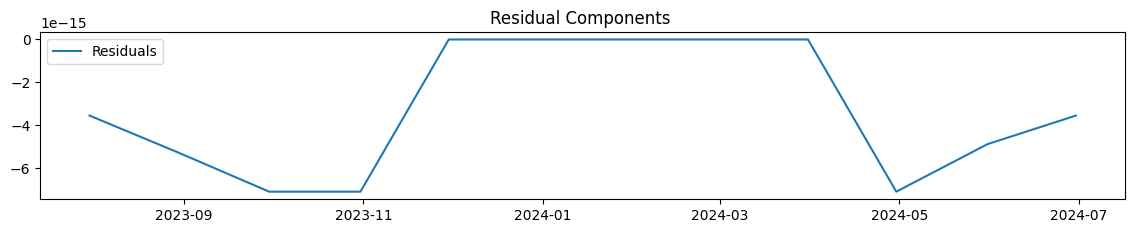

In [31]:
# Import required libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate Example data : Monthly retail sales 
data = pd.date_range(start='2023-01-01', periods=24, freq='ME')
sales = [200, 220, 210, 240, 300, 320, 280, 310, 350, 360, 370, 400] * 2
df = pd.DataFrame({'date': data, 'sales': sales})
df.set_index('date', inplace = True)

# Perdorm Seasonal Decomposition
decomposition = seasonal_decompose(df['sales'], model = 'additive')

# Edtract Components
trends = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid 

# Plot Comments 
plt.figure(figsize=  (14,10))
plt.subplot(4,1,1)
plt.plot(df['sales'], label = 'Original Series')
plt.title("Original Time Series")
plt.show()

# Plot graph for trends 
plt.figure(figsize=  (14,10))
plt.subplot(4,1,2)
plt.plot(trends, label = "Trend")
plt.title("Trend COmponents")
plt.legend(loc='upper left')
plt.show()

# Plot graph for seasonal 
plt.figure(figsize=  (14,10))
plt.subplot(4,1,3)
plt.plot(seasonal, label = "Seasonal")
plt.title("Seasonal Components ")
plt.legend(loc='upper left')
plt.show()

# Plot graph for residual
plt.figure(figsize=  (14,10))
plt.subplot(4,1,4)
plt.plot(residual, label = "Residuals")
plt.title("Residual Components ")
plt.legend(loc='upper left')
plt.show()

__Explanation:__

- __Data Creation:__ Creates a time series of monthly sales data.

- __Decomposition:__ Breaks down the sales data into trend, seasonal, and residual components using the additive model.

- __Plotting:__ Visualizes each component to better understand the decomposition.

# Interpreting Decomposition Results

__Components Analysis:__

- __Trend Component:__ Reveals the overall direction of the data. For instance, a rising trend indicates increasing values over time.

- __Seasonal Component:__ Shows periodic patterns. Peaks and troughs reflect regular seasonal effects, such as increased sales during holiday periods.

- __Residuals:__ Represents irregular variations or noise. Large residuals may indicate anomalies or outliers.

__Example Interpretation:__ In the decomposed sales data:

- __Trend:__ If the trend is upward, it signifies that sales are generally increasing.

- __Seasonality:__ Regular peaks in the seasonal component suggest predictable patterns, such as higher sales in December.

- __Residuals:__ Significant spikes in residuals could indicate unexpected events or data errors.

# Handling Missing Values in Decomposition

__Challenges:__

- Missing values can skew the results of the decomposition, making it difficult to accurately analyze the components.

__Strategies:__

- __Interpolation:__ Estimate missing values using interpolation techniques, such as linear interpolation.

- __Imputation:__ Replace missing values with statistical estimates like mean or median.

__Exclusion:__ In cases of minimal missing data, excluding the missing values might be a practical approach.

Example Code:

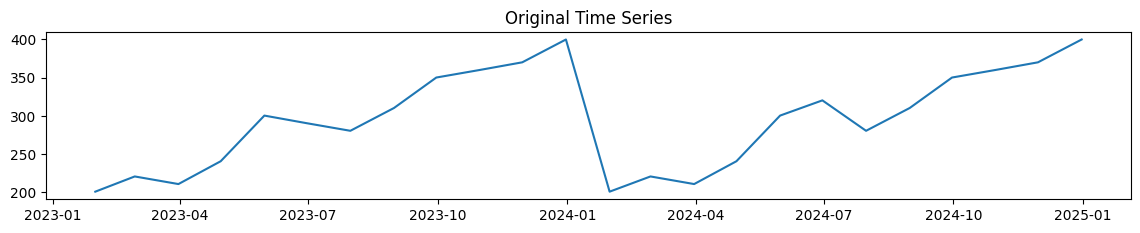

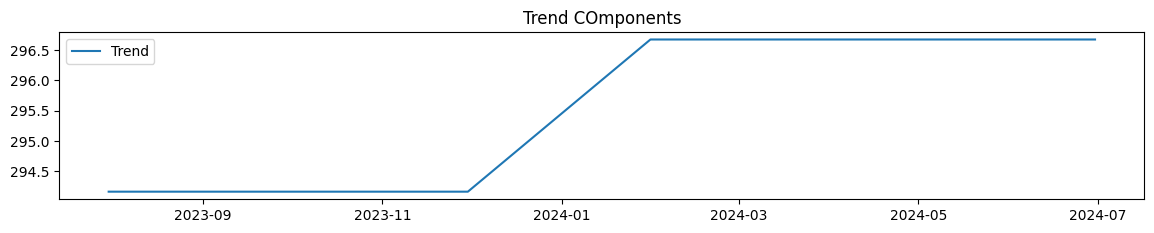

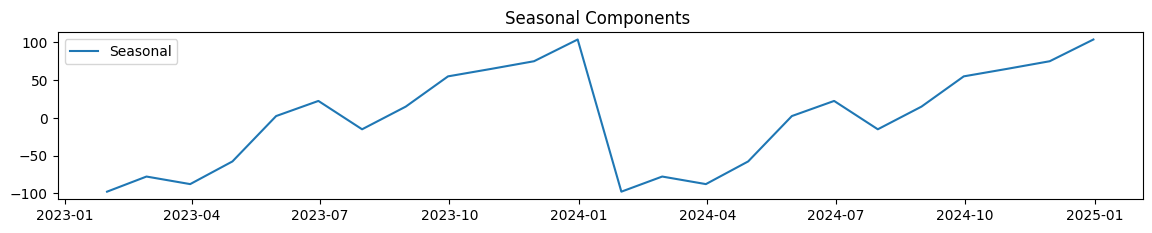

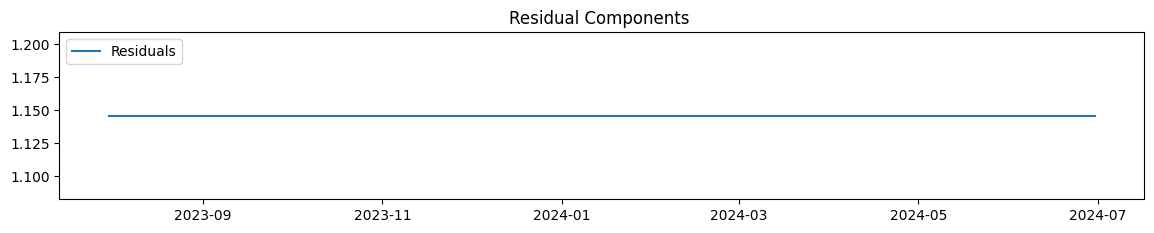

In [33]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate example data: Monthly retail sales
data = pd.date_range(start='2023-01-01', periods=24, freq='ME')
sales = [200, 220, 210, 240, 300, 320, 280, 310, 350, 360, 370, 400] * 2
df = pd.DataFrame({'date': data, 'sales': sales})
df.set_index('date', inplace=True)

# Introduce missing values 
df.loc['2023-06-30', 'sales'] = np.nan

# Handle missing values using interpolation
df['sales'] = df['sales'].interpolate()

# Perform seasonal decomposition again
decomposition = seasonal_decompose(df['sales'], model = 'additive')

# Extract and plot components 
trends = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Comments 
plt.figure(figsize=  (14,10))
plt.subplot(4,1,1)
plt.plot(df['sales'], label = 'Original Series')
plt.title("Original Time Series")
plt.show()

# Plot graph for trends 
plt.figure(figsize=  (14,10))
plt.subplot(4,1,2)
plt.plot(trends, label = "Trend")
plt.title("Trend COmponents")
plt.legend(loc='upper left')
plt.show()

# Plot graph for seasonal 
plt.figure(figsize=  (14,10))
plt.subplot(4,1,3)
plt.plot(seasonal, label = "Seasonal")
plt.title("Seasonal Components ")
plt.legend(loc='upper left')
plt.show()

# Plot graph for residual
plt.figure(figsize=  (14,10))
plt.subplot(4,1,4)
plt.plot(residual, label = "Residuals")
plt.title("Residual Components ")
plt.legend(loc='upper left')
plt.show()









__Explanation:__

- __Missing Values:__ Simulate missing values and handle them using interpolation.

- __Decomposition:__ Re-run the decomposition after filling missing values to ensure accuracy.

- __Plotting:__ Visualize components post-interpolation to verify reliability.


# __Summary__

Seasonal decomposition is a crucial technique for understanding time series data. Here’s a quick recap:

1. __What is Seasonal Decomposition:__ Decompose a time series into trend, seasonal, and residual components to analyze underlying patterns.

2. __Additive vs. Multiplicative Models:__ Choose the model based on whether seasonal effects are constant or proportional to the trend.

3. __Performing Seasonal Decomposition:__ Use seasonal_decompose to break down the time series and visualize the components.

4. __Interpreting Decomposition Results:__ Analyze trend, seasonal, and residual components to gain insights into the data.

5. __Handling Missing Values:__ Address missing data through interpolation or imputation to maintain accurate decomposition.

By mastering seasonal decomposition, you can gain a deeper understanding of time series data and enhance your analytical capabilities.